In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler

In [20]:
df=pd.read_excel("power.xlsx")
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,2.242,0.162,237.33,10.0,1,7,17
1,3.714,0.296,235.15,15.8,2,35,17
2,3.212,0.304,235.99,14.2,1,26,17
3,3.694,0.280,235.16,15.6,1,35,17
4,3.204,0.292,236.08,14.0,1,27,17


In [21]:
df.shape

(21240, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21240 entries, 0 to 21239
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Global_active_power           21240 non-null  float64
 1   Global_reactive_power         21240 non-null  float64
 2   Voltage                       21240 non-null  float64
 3   Global_intensity              21240 non-null  float64
 4   Kitchen_consumption           21240 non-null  int64  
 5   Laundry_consumption           21240 non-null  int64  
 6   Other_appliances_consumption  21240 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.1 MB


In [6]:
ss=StandardScaler()

In [8]:
df_scaled=ss.fit_transform(df)
df_new=pd.DataFrame(df_scaled,columns=df.columns)

In [9]:
df_new

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,-0.645095,-0.673126,0.001465,-0.576969,-0.754271,-0.165925,0.083161
1,0.260541,0.252945,-0.636716,0.255308,-0.693563,1.883736,0.083161
2,-0.048310,0.308233,-0.390812,0.025714,-0.754271,1.224917,0.083161
3,0.248236,0.142369,-0.633789,0.226609,-0.754271,1.883736,0.083161
4,-0.053232,0.225301,-0.364465,-0.002985,-0.754271,1.298119,0.083161
...,...,...,...,...,...,...,...
21235,-0.294407,0.211479,0.504984,-0.318676,-0.693563,-0.531936,0.083161
21236,-0.327630,0.211479,0.376177,-0.347375,-0.754271,-0.605138,0.323773
21237,-0.332552,0.183835,0.218095,-0.347375,-0.693563,-0.605138,0.083161
21238,-0.229192,0.059438,-0.065866,-0.232578,-0.754271,-0.605138,0.323773


(21240, 7)


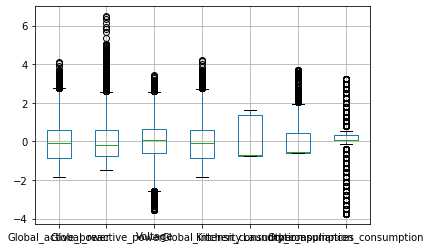

In [13]:
df_new.boxplot()
print(df_new.shape)

In [26]:
q1=df_new.quantile(.25)
q3=df_new.quantile(.75)
IQR=q3-q1
ll=q1-1.5*IQR
ul=q3+1.5*IQR

df_new=df[~((df<ll)|(df>ul)).any(axis=1)]
df_power = df_new.reset_index(drop = True)

In [27]:
df_power.shape

(16724, 7)

In [28]:
df_new=ss.fit_transform(df_power)
df_new=pd.DataFrame(df_new,columns=df.columns)

In [10]:
km=KMeans()

In [29]:
### to find optimal cluster Value
wcss=[]
for i in range(1,11):
    mod=KMeans(n_clusters=i)
    mod.fit_predict(df_new)
    wcss.append(mod.inertia_)
print(wcss)    

[117068.00000000009, 76347.28047779745, 61555.766696032726, 52402.32403206058, 47249.462813088765, 42589.04891950649, 38745.58287580749, 36295.964357867786, 34247.77199673401, 32257.22380267604]


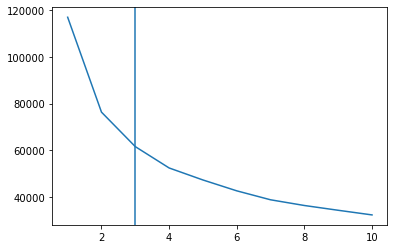

In [32]:
plt.plot(range(1,11),wcss)
plt.axvline(3)

In [ ]:
here we infer by elbow plot 2 or 3 mioght be the optimal val for cluster selection

In [36]:
k=KMeans(n_clusters=3)
k.fit_predict(df_new)
df_new['Cluster']=k.labels_

In [37]:
df_new.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Cluster
0,-0.661645,-0.661430,-0.006564,-0.580448,-0.741690,0.018119,-0.607511,0
1,0.357676,0.352612,-0.669335,0.354330,-0.680656,2.582192,-0.607511,1
2,0.010054,0.413151,-0.413956,0.096460,-0.741690,1.758026,-0.607511,1
3,0.343827,0.231532,-0.666295,0.322096,-0.741690,2.582192,-0.607511,1
4,0.004515,0.322342,-0.386593,0.064227,-0.741690,1.849600,-0.607511,1


In [38]:
df_new['Cluster'].value_counts()

0    9136
2    5045
1    2543
Name: Cluster, dtype: int64

In [39]:
df_new[df_new['Cluster']==0].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Cluster
count,9136.000000,9136.000000,9136.000000,9136.000000,9136.000000,9136.000000,9136.000000,9136.0
mean,-0.744476,-0.076818,0.444086,-0.744298,-0.687296,-0.353560,0.329186,0.0
std,0.465385,0.946371,0.859480,0.464273,0.196912,0.472967,0.930368,0.0
min,-2.005044,-1.539257,-2.554281,-1.998732,-0.741690,-0.531326,-2.025518,0.0
25%,-1.125603,-0.843049,-0.080290,-1.128422,-0.741690,-0.531326,-0.607511,0.0
50%,-0.872157,-0.207382,0.446431,-0.870552,-0.741690,-0.531326,0.810495,0.0
75%,-0.401275,0.503961,1.002794,-0.387046,-0.741690,-0.439751,0.810495,0.0
max,1.317445,2.895283,2.674924,1.256875,1.577630,2.490618,2.228502,0.0


In [40]:
df_new[df_new['Cluster']==1].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Cluster
count,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.0
mean,1.224953,-0.004723,-0.736686,1.238597,0.014728,2.129075,-0.585207,1.0
std,0.863582,1.025513,0.899254,0.862357,0.991139,0.538538,0.902353,0.0
min,-0.549464,-1.539257,-2.660690,-0.483747,-0.741690,-0.165029,-2.025518,1.0
25%,0.458777,-0.858184,-1.418753,0.451031,-0.741690,1.758026,-0.607511,1.0
50%,1.238503,-0.146842,-0.711899,1.256875,-0.680656,2.307470,-0.607511,1.0
75%,1.870039,0.625041,-0.112972,1.869316,1.394526,2.582192,-0.607511,1.0
max,3.128956,2.849878,2.340498,3.126431,1.638665,2.673766,2.228502,1.0


In [41]:
df_new[df_new['Cluster']==2].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Cluster
count,5045.000000,5045.000000,5045.000000,5045.000000,5045.000000,5045.000000,5045.000000,5045.0
mean,0.730719,0.141490,-0.432859,0.723520,1.237202,-0.432927,-0.301143,2.0
std,0.503084,1.064364,0.867194,0.500036,0.603032,0.255143,0.937019,0.0
min,-0.711503,-1.539257,-2.654609,-0.548214,-0.741690,-0.531326,-2.025518,2.0
25%,0.370141,-0.661430,-0.988560,0.354330,1.394526,-0.531326,-0.607511,2.0
50%,0.598657,0.019643,-0.371392,0.579966,1.455560,-0.531326,-0.607511,2.0
75%,1.025221,0.882335,0.142408,0.999005,1.516595,-0.439751,0.810495,2.0
max,3.116492,2.895283,2.264492,3.094197,1.638665,1.391729,2.228502,2.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cluster', ylabel='count'>

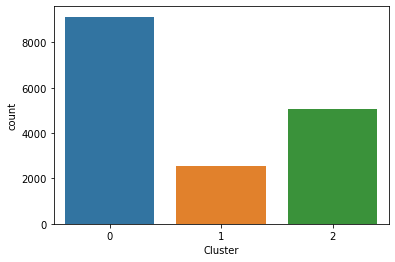

In [42]:
sns.countplot(df_new['Cluster'])

In [43]:
cov=np.cov(df_new.T)

In [44]:
eig_val,eig_vec=np.linalg.eig(cov)

print(eig_val)
print()
print(eig_vec)

[3.82988123e+00 1.26602079e+00 1.08539097e+00 9.77327693e-01
 6.77120706e-04 1.27541976e-01 2.07506346e-01 2.94224449e-01]

[[ 4.78878247e-01  6.99813729e-02 -2.58110324e-01 -7.34570055e-03
   7.01568867e-01 -2.77208390e-02 -4.53943851e-01  8.42568199e-03]
 [ 7.76612764e-02  2.09835781e-01  3.98462273e-02  9.68871751e-01
   8.91543063e-03  1.86903755e-02  8.92339754e-02  3.52981723e-02]
 [-3.48894403e-01  3.92295246e-01 -3.97800564e-01 -5.74596995e-02
  -2.10617930e-02 -6.19051315e-02 -9.54762100e-02  7.41241309e-01]
 [ 4.81875269e-01  5.50301617e-02 -2.45931616e-01  7.76419169e-03
  -7.12202858e-01 -1.84541306e-02 -4.43276292e-01 -1.25669049e-02]
 [ 3.81443383e-01  4.87021657e-01  1.48951213e-01 -1.90941525e-01
   5.68785710e-04  6.49897272e-01  3.58687637e-01  8.74191782e-02]
 [ 2.28038859e-01 -4.66502274e-01 -6.50308413e-01  5.52128596e-02
   3.68527674e-03  7.12760181e-02  5.40440046e-01  8.51769904e-02]
 [-2.81132879e-01  4.85825608e-01 -4.98064298e-01 -4.22884969e-02
  -5.8480808

In [49]:
ss=PCA(n_components=5)
x=ss.fit_transform(df_new)
pd.DataFrame(x,columns=['PCA1','PCA2','PCA3','PCA4','PCA5']).head()


,PCA1,PCA2,PCA3,PCA4,PCA5
0,-1.030316,1.127218,-0.363523,-0.374545,-0.266686
1,1.192542,1.896670,1.342660,0.646951,-0.087887
2,0.606190,1.467550,0.761824,0.657633,-0.204098
3,1.136632,1.953353,1.346283,0.540971,-0.080820
4,0.592288,1.520752,0.826521,0.572924,-0.229333


In [51]:
s)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Data must be 1-dimensional